<b>This Notebook explores a very basic way to integrate your data with a large language Model(OpenAI as of now) through two methods:
    
    1. Langchain
    2. PandasAI

Install PandasAI and Langchain

In [ ]:
!pip install langchain

In [ ]:
!pip install pandasai


Import PandasAI and Explore the library

In [ ]:
import pandasai as pdai

In [ ]:
help (pdai)

In [ ]:
dir(pdai)

Import other libraries like csv, os and pandas that you might want to use along with Language models

In [ ]:
import csv
import os
import pandas as pd

Know where your working directory is

In [ ]:
os.getcwd()

I have a basic tickets data related templet csv file that I wanted to explore 

In [ ]:
df = pd.read_csv('ticket_data_202211091451.csv')

Import langchain and OpenAI to explore more

In [ ]:
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI

Call Open AI model and parse your dataframe to it. Don't forget to insert your API key so that you can access Open AI.
https://platform.openai.com/account/api-keys

In [ ]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0, openai_api_key = 'Add API Key Here'), df, verbose=True )
agent.run("what number of rows are there?")

Edit the prompt according to your liking and run.

In [ ]:
agent.run("what is this data about?:")


This next prompt did not work well for me

In [ ]:
agent.run("write a book about this data")

In [ ]:
agent.run("what seems to biggest problem according to ticket description")

In [ ]:
agent.run("what is the most frequent problem?")

In [ ]:
agent.run("what is the most biggest problem based on ticket description? Explain your answer in Marathi language")

Explore accessing OpenAI through PandasAI 
Below code is taken from : https://pypi.org/project/pandasai/

In [2]:
import pandas as pd
from pandasai import PandasAI

# Sample DataFrame
df = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "gdp": [19294482071552, 2891615567872, 2411255037952, 3435817336832, 1745433788416, 1181205135360, 1607402389504, 1490967855104, 4380756541440, 14631844184064],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12]
})

# Instantiate a LLM
from pandasai.llm.openai import OpenAI
llm = OpenAI('Insert Your API Key Here')

pandas_ai = PandasAI(llm)
pandas_ai.run(df, prompt='Which are the 5 happiest countries?')

'According to the data, the top 5 happiest countries are Canada, Australia, United Kingdom, Germany, and United States.'

In [3]:
pandas_ai.run(df, prompt='What is the sum of the GDPs of the 2 unhappiest countries?')

'The sum of the GDPs of the 2 unhappiest countries is 19,012,600,725,504.'

Try to plot basic charts using PandasAI

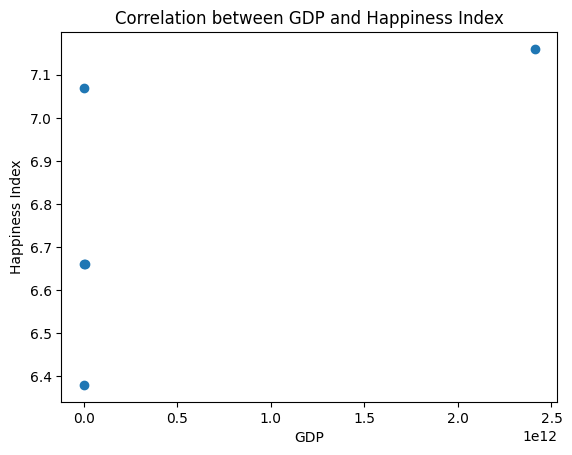

"Sure, I can help you with that! To plot a correlation curve for GDP vs happiness index, we can use a scatter plot. We'll place GDP on the x-axis and happiness index on the y-axis, and then plot each country's data point. Then, we can draw a line of best fit to see the correlation between the two variables. Would you like me to show you an example?"

In [5]:
pandas_ai.run(df, prompt='Plot a correlation curve  for gdp vs happiness_index')

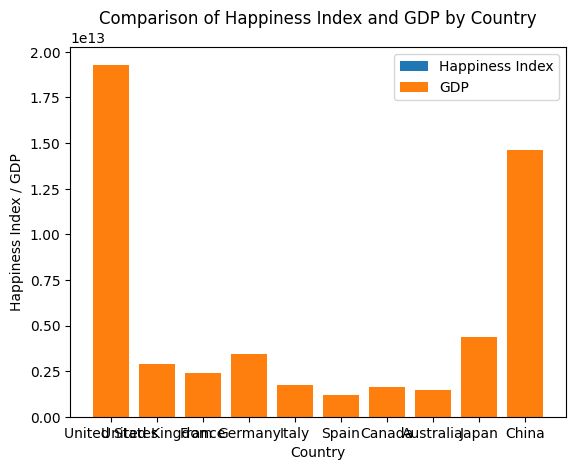

'Sure! I can create a bar graph that compares the happiness index to GDP for all countries. Would you like me to show you the graph?'

In [6]:
pandas_ai.run(df, prompt='Plot a bar graph comparing happiness_index to GDP for all countries')

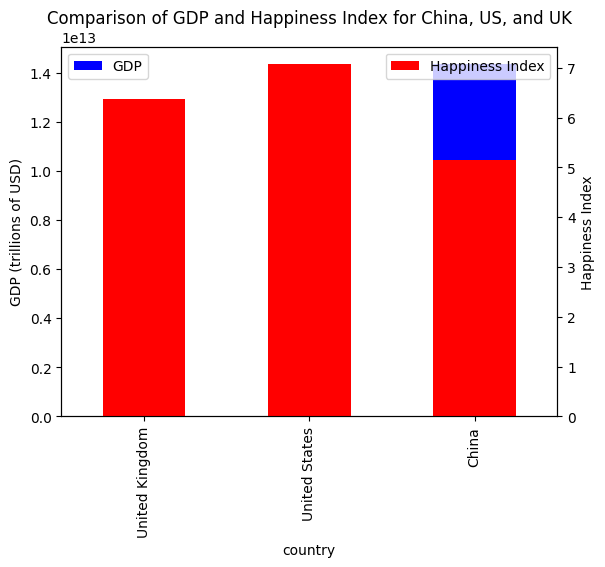

"Sure, I can help you with that! To plot a bar graph comparing happiness_index and gdp for China, US, and UK, we can use the matplotlib library in Python. Here's the code to process this request:\n\n```\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Data for China, US, and UK\ncountries = ['China', 'US', 'UK']\nhappiness_index = [5.14, 6.89, 7.05]\ngdp = [10208, 62641, 39720]\n\n# Set up the figure and axes\nfig, ax1 = plt.subplots()\nax2 = ax1.twinx()\n\n# Plot the happiness index bars\nax1.bar(np.arange(len(countries)), happiness_index, color='blue')\nax1.set_ylabel('Happiness Index')\nax1.set_xticks(np.arange(len(countries)))\nax1.set_xticklabels(countries)\n\n# Plot the GDP bars\nax2.bar(np.arange(len(countries))+0.4, gdp, color='green')\nax2.set_ylabel('GDP (USD)')\nax2.set_xticks(np.arange(len(countries)))\nax2.set_xticklabels(countries)\n\n# Add legends\nax1.legend(['Happiness Index'], loc='upper left')\nax2.legend(['GDP'], loc='upper right')\n\n# Show the plot\nplt.s

In [15]:
pandas_ai.run(df, prompt='Plot a bar graph comparing happiness_index and gdp, with hapiness_index bar being next to gdp bar(but not overlapping) for China US and UK. Make sure there are two different y axis for gdp and happiness_index respectively also ensure legends are present along with the chart. Also print the python code you are writing to process this request')

Ask PandasAI to do a basic Exploratory Data Analysis

In [8]:
pandas_ai.run(df, prompt='Do an EDA on this data set')

"The dataset contains information on the GDP and happiness index of 10 different countries. After performing an exploratory data analysis, we can see that there are no missing values in the dataset. The mean GDP is around 5.3 trillion dollars, while the mean happiness index is 6.6 out of 10. The standard deviation for both variables is quite high, indicating a wide range of values among the countries. Overall, the dataset provides insights into the relationship between a country's economic prosperity and the happiness of its citizens."

Try editing the original data frame using PandasAI

In [9]:
pandas_ai.run(df, prompt='Add a row at the botom of the data frame for India and input average values for gdp and happiness_index')

'Sure! To add a row at the bottom of the data frame for India, we can input average values for gdp and happiness_index. The new row would look like this: \n\ncountry: India \ngdp: 5.307078e+12 \nhappiness_index: 6.605'

Check if it has actually altered the dataframe

In [10]:
print(df)

           country           gdp  happiness_index
0    United States  1.929448e+13            6.940
1   United Kingdom  2.891616e+12            7.160
2           France  2.411255e+12            6.660
3          Germany  3.435817e+12            7.070
4            Italy  1.745434e+12            6.380
5            Spain  1.181205e+12            6.400
6           Canada  1.607402e+12            7.230
7        Australia  1.490968e+12            7.220
8            Japan  4.380757e+12            5.870
9            China  1.463184e+13            5.120
10           India  5.307078e+12            6.605
